In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [75]:
df = pd.read_csv('../dataset/diabetes2.csv')

##### organize the data

In [109]:
df_positive = df[ df['Diabetes_binary'] == 1 ] 
df_negative = df[ df['Diabetes_binary'] == 0 ]
df_negative_cut = df_negative.sample(n = 40000)
dataset = pd.concat([df_positive, df_negative_cut])

##### drop data

In [116]:
X = dataset.drop(['Diabetes_binary','Education','NoDocbcCost','Income','Education','DiffWalk','AnyHealthcare'], axis=1)
y = dataset['Diabetes_binary']

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [118]:
model = Sequential()

model.add(Dense(19, input_shape=(17,), activation='relu'))
model.add(Dense(11, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
result = model.fit(X_train, y_train, epochs = 20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20


2022-11-08 10:26:40.639270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6028/6028 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.7087

2022-11-08 10:27:33.636976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6028/6028 [==============================] - 58s 10ms/step - loss: 0.5704 - accuracy: 0.7087 - val_loss: 0.5580 - val_accuracy: 0.7167
Epoch 2/20
6028/6028 [==============================] - 63s 10ms/step - loss: 0.5304 - accuracy: 0.7335 - val_loss: 0.5252 - val_accuracy: 0.7360
Epoch 3/20
6028/6028 [==============================] - 55s 9ms/step - loss: 0.5237 - accuracy: 0.7368 - val_loss: 0.5251 - val_accuracy: 0.7348
Epoch 4/20
 907/6028 [===>..........................] - ETA: 46s - loss: 0.5193 - accuracy: 0.7385

KeyboardInterrupt: 

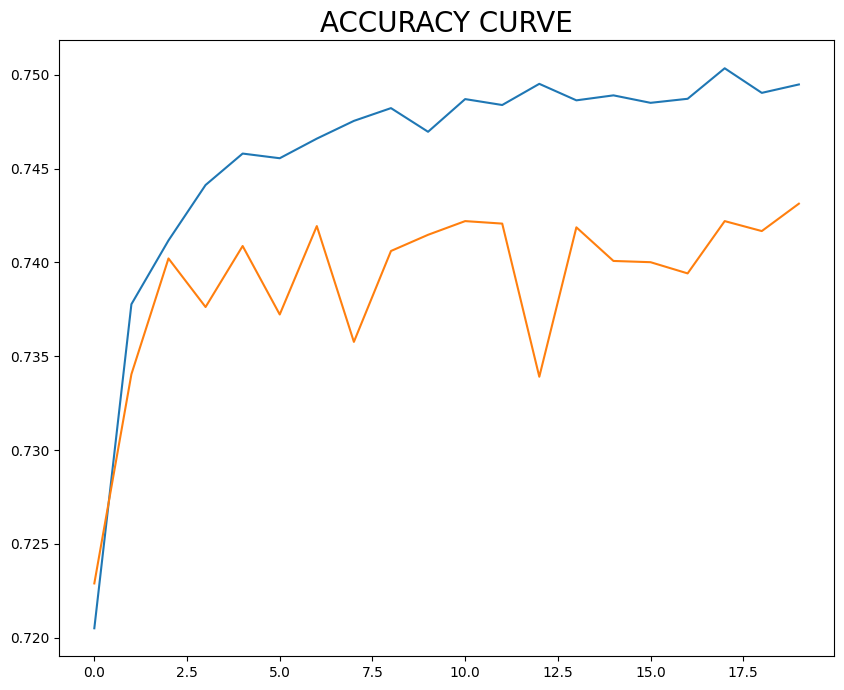

In [94]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

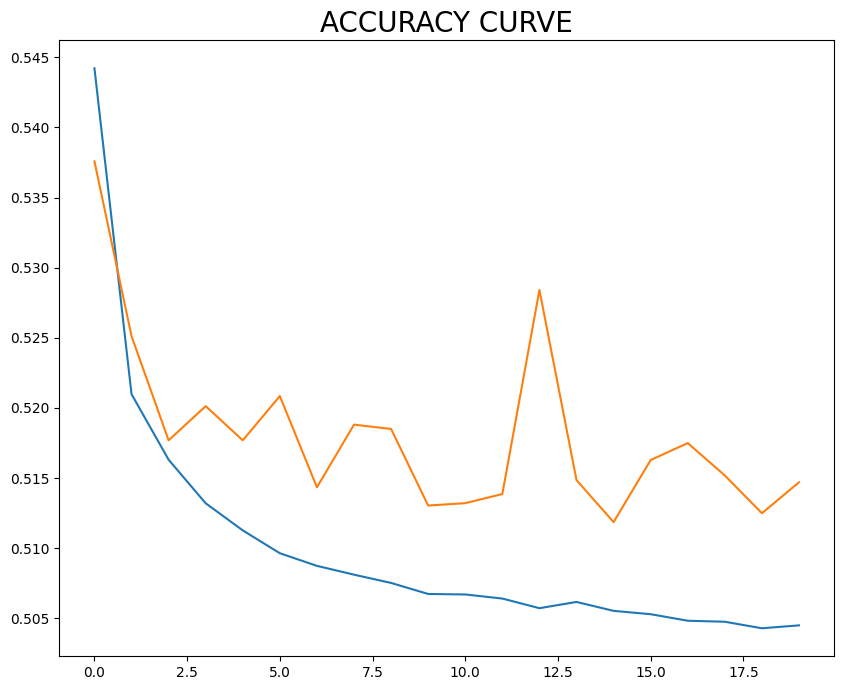

In [95]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [96]:
model.evaluate(X_test, y_test)

  1/471 [..............................] - ETA: 2:18 - loss: 0.3846 - accuracy: 0.8125

2022-11-08 09:11:27.017283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


471/471 [==============================] - 2s 4ms/step - loss: 0.5147 - accuracy: 0.7431


[0.5147007703781128, 0.7431320548057556]

model.save('./model',overwrite=True)